In [1]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
import random
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Load the Dataset
df_rating_books_raw = pd.read_csv('../data/processed/filtered_data_processed.csv')

df_rating_books_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552639 entries, 0 to 552638
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      552639 non-null  int64  
 1   index           552639 non-null  int64  
 2   title           552639 non-null  object 
 3   user_id         449139 non-null  object 
 4   review          552639 non-null  float64
 5   text            552639 non-null  object 
 6   review_year     552639 non-null  int64  
 7   helpfulness_0   552639 non-null  float64
 8   helpfulness_1   552639 non-null  float64
 9   authors         552639 non-null  object 
 10  publisher       458730 non-null  object 
 11  categories      552639 non-null  object 
 12  published_year  552639 non-null  int64  
 13  num_row         552639 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 59.0+ MB


In [3]:
df_rating_books_raw = df_rating_books_raw.drop(['Unnamed: 0'], axis=1)

In [4]:
df_vader_sentiment_raw = pd.read_csv('../data/processed/df_reduced_with_sentiment.csv')

df_vader_sentiment_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552639 entries, 0 to 552638
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          552639 non-null  int64  
 1   num_row             552639 non-null  int64  
 2   text_clean          552636 non-null  object 
 3   compound_sentiment  552639 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.9+ MB


In [5]:
df_vader_sentiment = df_vader_sentiment_raw.drop(['Unnamed: 0'], axis=1)
df_vader_sentiment.sample()

,num_row,text_clean,compound_sentiment
71580,71580,beautiful magnificent book chock full sumptiou...,0.9774


In [6]:
df_all_data = df_rating_books_raw.merge(df_vader_sentiment, on='num_row', how='inner')
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552639 entries, 0 to 552638
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               552639 non-null  int64  
 1   title               552639 non-null  object 
 2   user_id             449139 non-null  object 
 3   review              552639 non-null  float64
 4   text                552639 non-null  object 
 5   review_year         552639 non-null  int64  
 6   helpfulness_0       552639 non-null  float64
 7   helpfulness_1       552639 non-null  float64
 8   authors             552639 non-null  object 
 9   publisher           458730 non-null  object 
 10  categories          552639 non-null  object 
 11  published_year      552639 non-null  int64  
 12  num_row             552639 non-null  int64  
 13  text_clean          552636 non-null  object 
 14  compound_sentiment  552639 non-null  float64
dtypes: float64(4), int64(4), object(7)

In [7]:
#Original Text is removed as clean text is added
df_all_data = df_all_data.drop(['text'], axis=1)
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552639 entries, 0 to 552638
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               552639 non-null  int64  
 1   title               552639 non-null  object 
 2   user_id             449139 non-null  object 
 3   review              552639 non-null  float64
 4   review_year         552639 non-null  int64  
 5   helpfulness_0       552639 non-null  float64
 6   helpfulness_1       552639 non-null  float64
 7   authors             552639 non-null  object 
 8   publisher           458730 non-null  object 
 9   categories          552639 non-null  object 
 10  published_year      552639 non-null  int64  
 11  num_row             552639 non-null  int64  
 12  text_clean          552636 non-null  object 
 13  compound_sentiment  552639 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 59.0+ MB


In [8]:
df_all_data = df_all_data.drop(['index'], axis=1)
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552639 entries, 0 to 552638
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               552639 non-null  object 
 1   user_id             449139 non-null  object 
 2   review              552639 non-null  float64
 3   review_year         552639 non-null  int64  
 4   helpfulness_0       552639 non-null  float64
 5   helpfulness_1       552639 non-null  float64
 6   authors             552639 non-null  object 
 7   publisher           458730 non-null  object 
 8   categories          552639 non-null  object 
 9   published_year      552639 non-null  int64  
 10  num_row             552639 non-null  int64  
 11  text_clean          552636 non-null  object 
 12  compound_sentiment  552639 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 54.8+ MB


In [9]:
df_all_data = df_all_data.drop(['num_row'], axis=1)
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552639 entries, 0 to 552638
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               552639 non-null  object 
 1   user_id             449139 non-null  object 
 2   review              552639 non-null  float64
 3   review_year         552639 non-null  int64  
 4   helpfulness_0       552639 non-null  float64
 5   helpfulness_1       552639 non-null  float64
 6   authors             552639 non-null  object 
 7   publisher           458730 non-null  object 
 8   categories          552639 non-null  object 
 9   published_year      552639 non-null  int64  
 10  text_clean          552636 non-null  object 
 11  compound_sentiment  552639 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 50.6+ MB


In [10]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [11]:
df_all_data['authors'] = df_all_data['authors'].apply(custom_string_to_list)
df_all_data['categories'] = df_all_data['categories'].apply(custom_string_to_list)

In [12]:
df_all_data.sample(10, random_state=4)

,title,user_id,review,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year,text_clean,compound_sentiment
236953,"The Railroad Caboose: Its 100 Year History, Le...",A9P01ERL4Z2U8,5.0,2000,1.000000,1.000000,"[Other, Other]","San Marino, Calif. : Golden West Books",[Transportation],1968,mr knapke given us ability go back time see re...,0.8955
62534,Jack Maggs (Windsor Selections),A2U873EIWDMU0K,4.0,2005,0.800000,0.800000,[Peter Carey],Sterling Audio Books,[Fiction],1997,started reading book recommendation basically ...,0.9349
95427,Plainsong,A3676GB8ZUO4N0,5.0,2005,1.000000,1.000000,[Kent Haruf],Vintage,[Fiction],2001,kent haruf yet another great writer hails high...,0.9881
254088,Pox Americana,A14OJS0VWMOSWO,5.0,2002,0.666667,0.666667,[Other],Hill and Wang,[History],2002,great smallpox epidemic covered survey reveal...,0.5859
264429,The battle for investment survival,A32UY3PXGHB9SP,4.0,2007,0.000000,1.000000,[G. M. Loeb],Simon and Schuster,[Business & Economics],2014,loebs book likened armchair chat family frie...,0.6486
52820,Fresh from the Vegetarian Slow Cooker: 200 Rec...,A39Y3V9DK404ZD,5.0,2010,1.000000,1.000000,[Robin Robertson],ReadHowYouWant.com,[Cooking],2010,ordered preowned back began using often faded...,0.9519
209640,How to Win Friends & Influence People,AWM5UE71A5MUR,1.0,2006,0.743902,0.743902,[Dale Carnegie],Sristhi Publishers & Distributors,[Self-Help],2020,two sides cointhe book says see things peoples...,0.9972
270493,Blue At the Mizzen (aubrey/maturin series),A2GBJQ9THOYDAJ,4.0,2003,1.000000,1.000000,"[""Patrick O\'Brian""]",W. W. Norton & Company,[Fiction],2000,last couple pages twentieth last volume aubrey...,-0.9119
469358,"A Rich, Deliciously Satisfying Collection of B...",A2M1F2SOKZMIXC,3.0,2011,0.000000,1.000000,[Other],Just My Best Publishing Company,[Cooking],2005,huge collection recipes breakfast brunch but k...,-0.6249
437448,The little prince,A338L2BWFA6TZO,5.0,2009,1.000000,1.000000,[Antoine de Saint-Exupery],HMH Books For Young Readers,[Juvenile Fiction],2015,opening cover new book comes feeling great ant...,0.9719


# Analysis and EDA for target feature

In [13]:
df_all_data['review'].value_counts()

review
5.0    332377
4.0    107982
3.0     46854
1.0     37216
2.0     28210
Name: count, dtype: int64

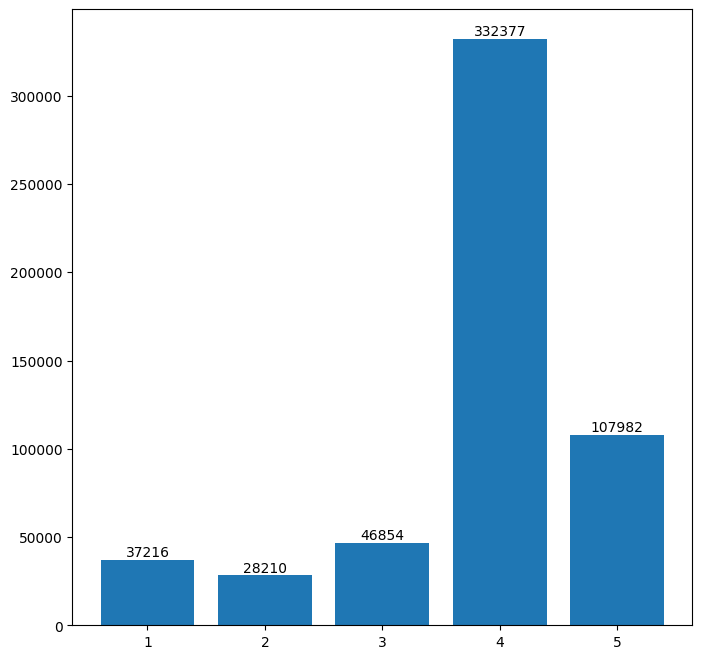

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data['review'].unique(), df_all_data['review'].value_counts())
ax.bar_label(bars)
plt.show()

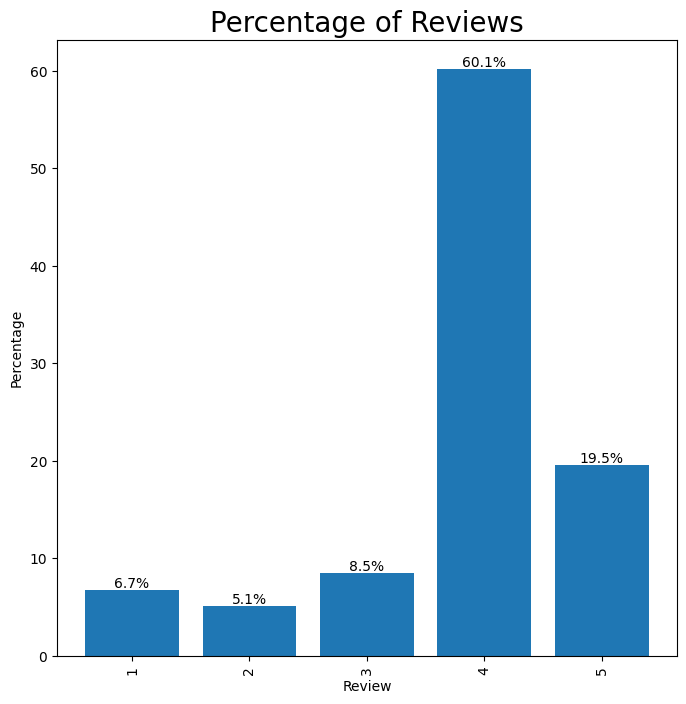

In [16]:
#Show a barplot by Percentages
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data['review'].unique(), (df_all_data['review'].value_counts())/(df_all_data['review'].value_counts().sum())*100)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Review')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews', fontsize = 20)
plt.show()

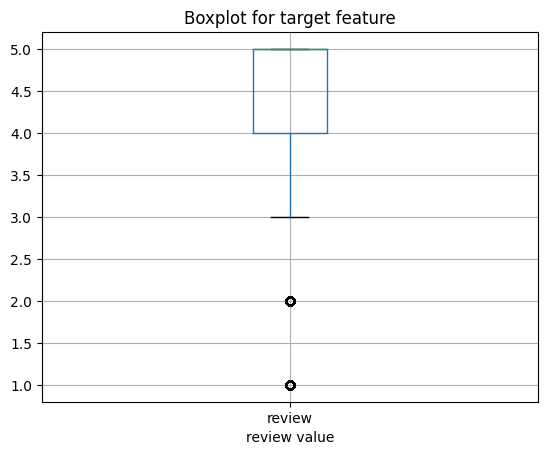

In [17]:
#Create a box plot to check for outliers, median and quartiles
df_all_data.boxplot(column='review')
plt.xlabel("review value")
plt.title("Boxplot for target feature")
plt.show()

In [18]:
df_all_data['review'].describe().T

count    552639.000000
mean          4.212535
std           1.204705
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review, dtype: float64

## Key Findings:
- The Dataset is unbalanced. Having 79.6% of the entries with a High/Postive review [4, 5]. Only 11.8% of the entries have a Low/Negative review [1, 2]. And 8.5% of the entries reviews are neutral [3]
- The Dataset review target feature is biased. Having the 25% Quartile on 4, and 50% and 75% Quartiles on 5. 
- The entries on the dataset with a low review [1, 2] are almost considered as outliers on the boxplot.

# Univariate EDA

## Categories

In [19]:
categories = df_all_data['categories'].explode()
categories.info()

<class 'pandas.core.series.Series'>
Index: 566066 entries, 0 to 552638
Series name: categories
Non-Null Count   Dtype 
--------------   ----- 
566066 non-null  object
dtypes: object(1)
memory usage: 8.6+ MB


In [20]:
print(f'Total of Categories (including nan): {len(categories.unique())}')

Total of Categories (including nan): 1342


In [21]:
categories_counts = categories.value_counts()
print(f'Total of entries after explode category column {categories_counts.sum()}')

Total of entries after explode category column 566066


In [22]:
top_10_categories_counts = categories_counts[:10].sort_values(ascending=False)
top_10_categories_counts

categories
Fiction                      167330
Other                         54399
Juvenile Fiction              42297
Biography & Autobiography     22601
Religion                      20334
History                       19023
Business & Economics          14223
Computers                      9168
Social Science                 6661
Cooking                        6625
Name: count, dtype: int64

In [27]:
other_categories_counts = categories_counts[10:].sum()
other_categories_counts

203405

In [34]:
top_categories_with_other = pd.concat([top_10_categories_counts, pd.Series({'Other': other_categories_counts})])
top_categories_with_other = top_categories_with_other.groupby(top_categories_with_other.index).sum()
top_categories_with_other = top_categories_with_other.sort_values(ascending=False)
top_categories_with_other

Other                        257804
Fiction                      167330
Juvenile Fiction              42297
Biography & Autobiography     22601
Religion                      20334
History                       19023
Business & Economics          14223
Computers                      9168
Social Science                 6661
Cooking                        6625
dtype: int64

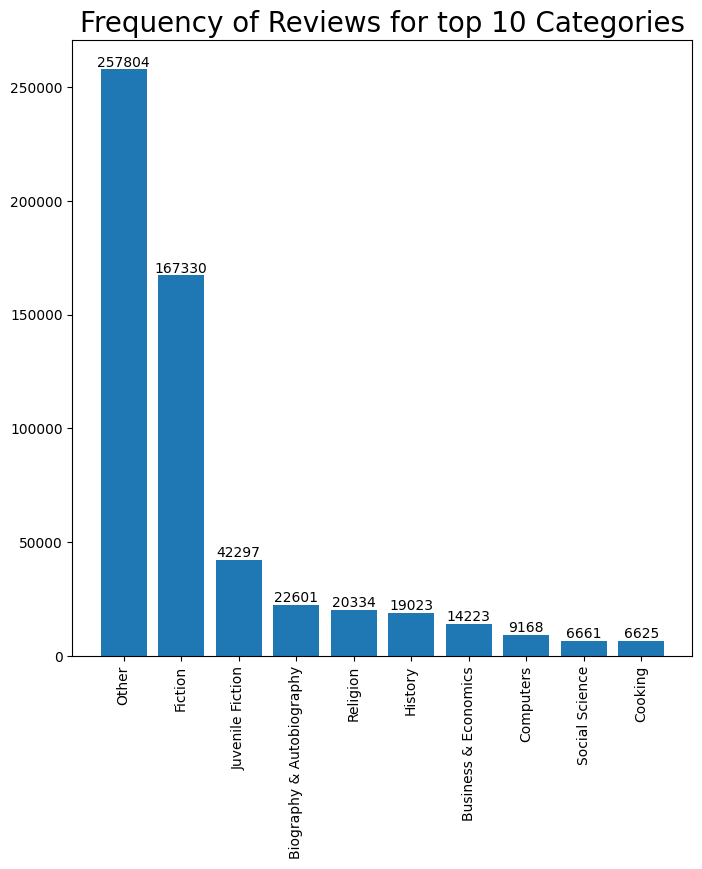

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_categories_with_other.keys().map(str), top_categories_with_other)
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Categories', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

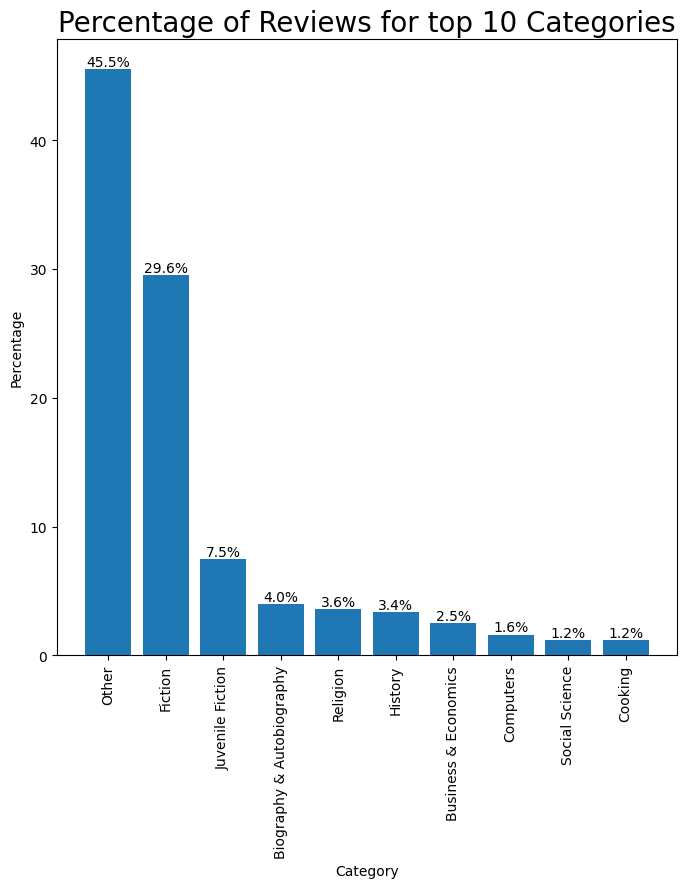

In [36]:
#Show a barplot by Percentages
category_percetage = top_categories_with_other/categories_counts.sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_categories_with_other.keys().map(str), category_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Categories', fontsize = 20)
plt.show()

In [42]:
top_categories = top_10_categories_counts.index.to_list()
top_categories

['Fiction',
 'Other',
 'Juvenile Fiction',
 'Biography & Autobiography',
 'Religion',
 'History',
 'Business & Economics',
 'Computers',
 'Social Science',
 'Cooking']

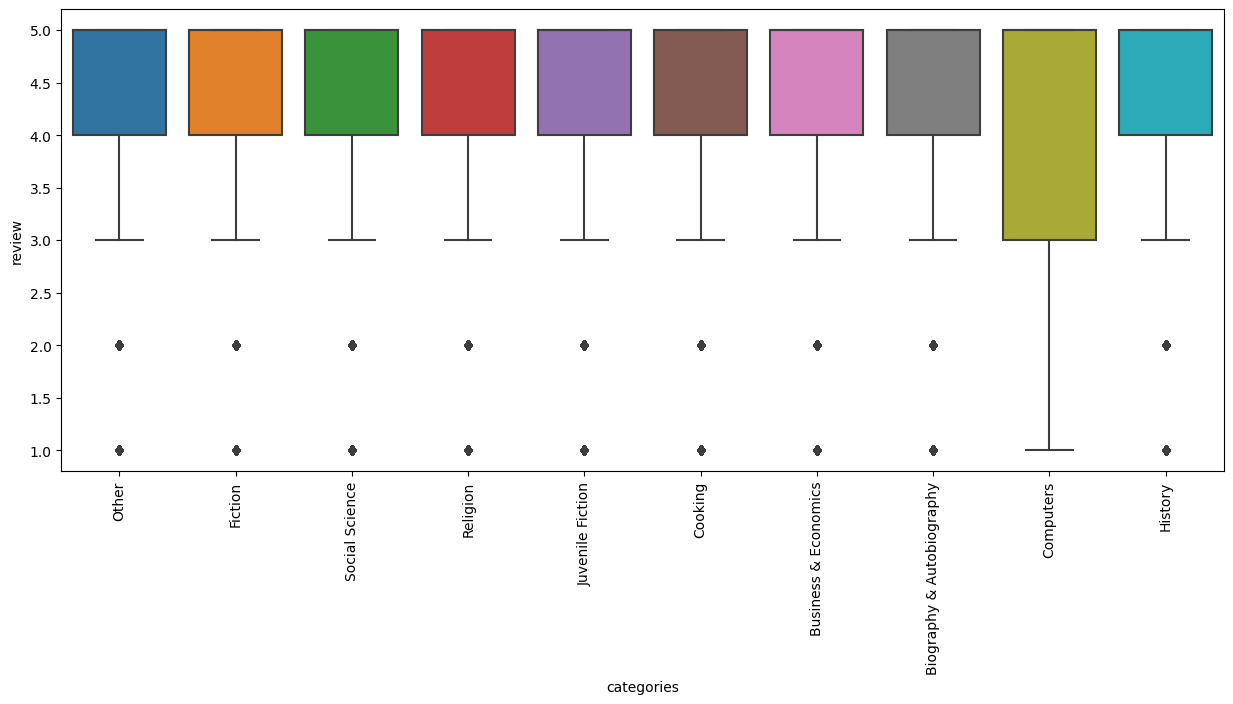

In [51]:
top_categories = top_10_categories_counts.index.to_list()

top_category_filtered_df = df_all_data.explode('categories')

top_category_filtered_df['categories'] = top_category_filtered_df['categories'].apply(lambda x: x if x in top_categories else 'Other')

plt.figure(figsize=(15, 6))  # Set the figure size
sns.boxplot(x='categories', y='review', data=top_category_filtered_df)
plt.xticks(rotation=90)
plt.show()

### Key Findings for Categories:

- There are 62 different Categories in the Dataset.
- Top 10 Categories represents the 74.5% of the Dataset.
- Top 10 most reviewed categories are 'Fiction', 'Juvenile Fiction', 'Young Adult Fiction', 'Business & Economics', 'Adventure stories', 'Biography & Autobiography', 'Baggins','Drama', 'Literary Criticism', 'Self-Help'.
- All of the Top 10 most reviewed categories contains reviews values in the 5 Categories [1 ,2 ,3, 4, 5]. All of the Top Categories are biased to high review score. Some of them even have the 25%,50% and 75% quartiles of 5 review score.
- Fiction is most rated category. This category is biased to High review scores, having the mean on 4.5. And the 25% quartile on 4.

## Authors

In [52]:
authors = df_all_data['authors'].explode()
authors.info()

<class 'pandas.core.series.Series'>
Index: 650188 entries, 0 to 552638
Series name: authors
Non-Null Count   Dtype 
--------------   ----- 
650188 non-null  object
dtypes: object(1)
memory usage: 9.9+ MB


In [53]:
print(f'Total of Authors (including nan): {len(authors.unique())}')

Total of Authors (including nan): 17923


In [54]:
author_counts = authors.value_counts(ascending=False)
print(f'Total of entries after explode authors column {author_counts.sum()}')

Total of entries after explode authors column 650188


In [55]:
top_10_authors_counts = author_counts[:10].sort_values(ascending=False)
top_10_authors_counts

authors
Other               140176
J. R. R. Tolkien     10036
Jane Austen           4525
Charles Dickens       3863
John Steinbeck        3343
Harper Lee            3021
Charlotte Brontë      2850
Emily Brontë          2575
Lewis Carroll         2535
Kurt Vonnegut         2400
Name: count, dtype: int64

In [56]:
other_authors_counts = author_counts[10:].sum()
other_authors_counts

474864

In [57]:
top_authors_with_other = pd.concat([top_10_authors_counts, pd.Series({'Other': other_authors_counts})])
top_authors_with_other = top_authors_with_other.groupby(top_authors_with_other.index).sum()
top_authors_with_other = top_authors_with_other.sort_values(ascending=False)
top_authors_with_other

Other               615040
J. R. R. Tolkien     10036
Jane Austen           4525
Charles Dickens       3863
John Steinbeck        3343
Harper Lee            3021
Charlotte Brontë      2850
Emily Brontë          2575
Lewis Carroll         2535
Kurt Vonnegut         2400
dtype: int64

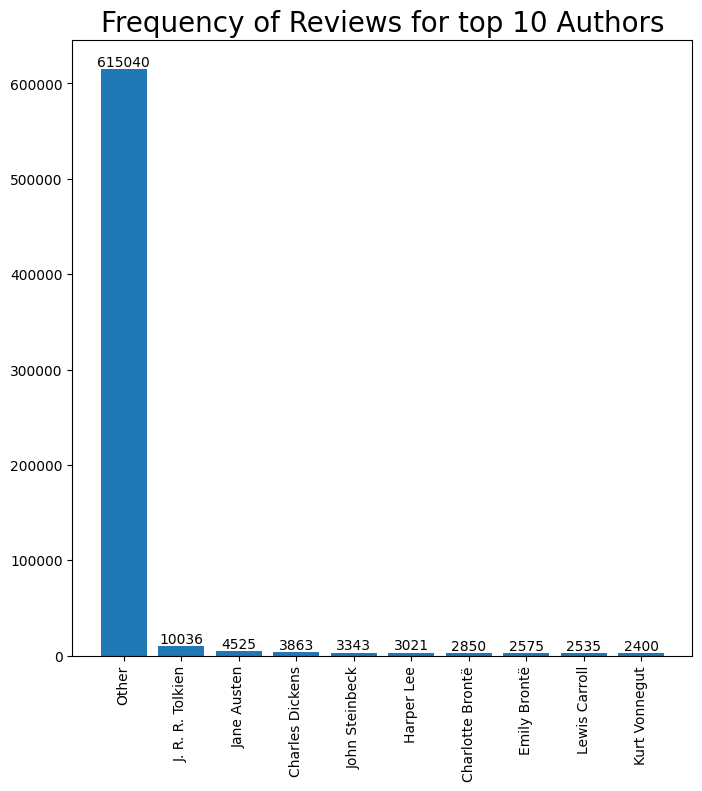

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_authors_with_other.keys().map(str), top_authors_with_other)
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Authors', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

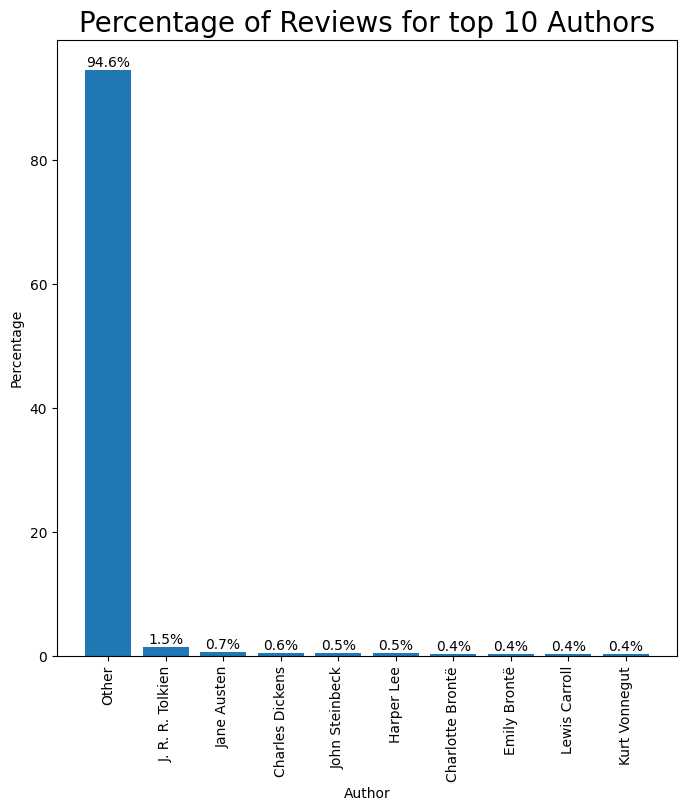

In [59]:
#Show a barplot by Percentages
author_percetage = top_authors_with_other/author_counts.sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_authors_with_other.keys().map(str), author_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Author')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Authors', fontsize = 20)
plt.show()


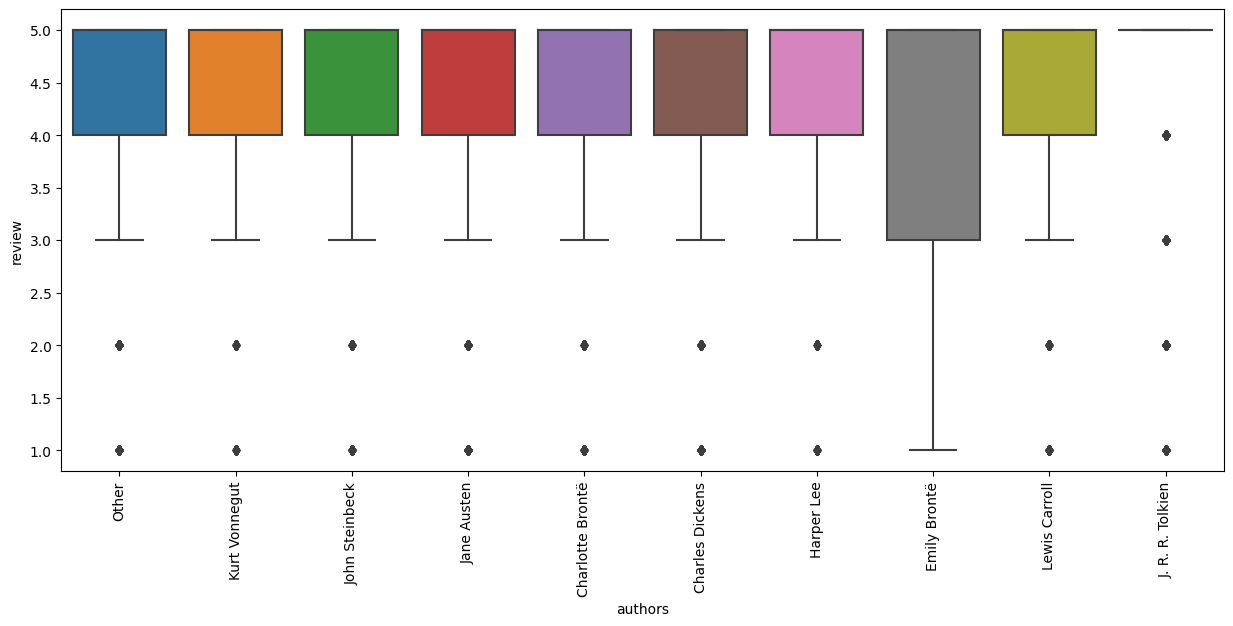

In [60]:
top_authors = top_10_authors_counts.index.to_list()

top_authors_filtered_df = df_all_data.explode('authors')

top_authors_filtered_df['authors'] = top_authors_filtered_df['authors'].apply(lambda x: x if x in top_authors else 'Other')

plt.figure(figsize=(15, 6))  # Set the figure size
sns.boxplot(x='authors', y='review', data=top_authors_filtered_df)
plt.xticks(rotation=90)
plt.show()

#FIXME Las variables title y author son dependientes.

#Definir una regla: Se debe elegir una de las dos. Authors me amplia la cantidad de predicciones que puede generar mi modelo. Title reduce o encajona a ciertos
# libros.

### Key Findings for Authors

- Top 10 most reviewed authors are J. R. R. Tolkien, Harper Lee, John Ronald Reuel Tolkien, Charlotte Brontë, J. K. Rowling, Charles Dickens, George Orwell, John Steinbeck, William Golding and Ibi Zoboi.
- All of the Top 10 most reviewed authors contains reviews values in the 5 review scores [1 ,2 ,3, 4, 5]. All of the Top authors are biased to high review score. Some of them even have the 25%,50% and 75% quartiles of 5 review score (J. R. R. Tolkien, John Ronald Reuel Tolkien, J. K. Rowling).
- J. R. R. Tolkien and John Ronald Reuel Tolkien are the same author. Who is the most rated author. Having 67.7% of the reviews from the top reviewed authors. Reviews for this Tolkien are biased to High review scores, having the 25%, 50% and 75% quartiles on 5. Even so, there are negative reviews for this author.

## Helpfulness

In [61]:
df_all_data.sample(2)

,title,user_id,review,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year,text_clean,compound_sentiment
517688,Telling the Stories of Life through Guided Aut...,A3PS8DEBOKAI11,5.0,2012,0.0,1.0,"[Other, Other]",JHU Press,[Biography & Autobiography],2001,found book provide excellent guidance facilita...,0.9783
539359,Twenty Thousand Leagues Under the Sea (Library...,AXB5FKEMBX82Z,2.0,2002,0.0,0.0,[Jules Verne],Library of Alexandria,[Other],2020,reading book extremely fascinated beginning bo...,0.5849


In [ ]:
# helpfulness 0/0 = 1 o 0/0 = 0. Revisar ambos
# El 3 es un caso unico aislado (remover), pero si no, analisis.

In [62]:
df_all_data['helpfulness_0'].describe().T

count    552639.000000
mean          0.495402
std           0.430882
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: helpfulness_0, dtype: float64

In [63]:
df_all_data['helpfulness_1'].describe().T

count    552639.000000
mean          0.788386
std           0.320177
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           1.000000
Name: helpfulness_1, dtype: float64

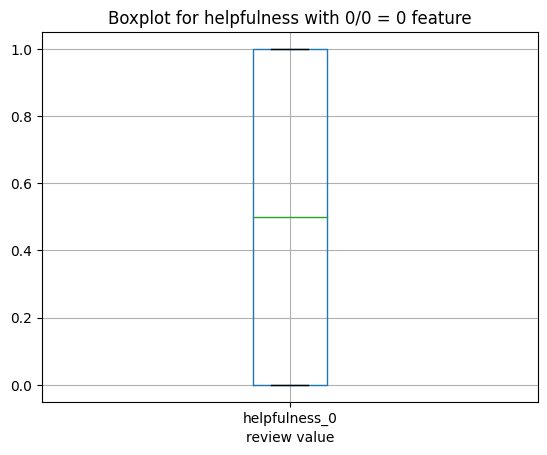

In [64]:
#Create a box plot to check for outliers, median and quartiles 4/6 0/0 1/3 5/5
df_all_data.boxplot(column='helpfulness_0')
plt.xlabel("review value")
plt.title("Boxplot for helpfulness with 0/0 = 0 feature")
plt.show()

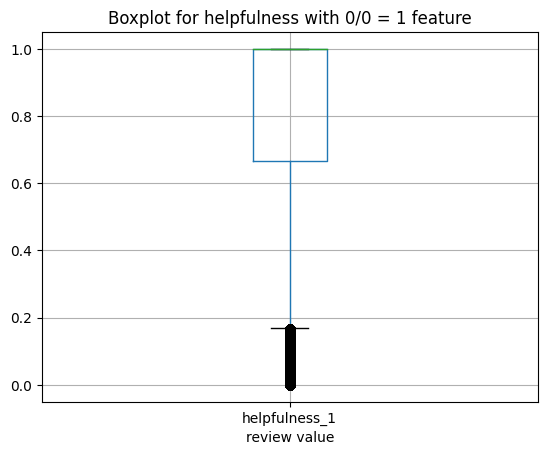

In [65]:
#Create a box plot to check for outliers, median and quartiles
df_all_data.boxplot(column='helpfulness_1')
plt.xlabel("review value")
plt.title("Boxplot for helpfulness with 0/0 = 1 feature")
plt.show()

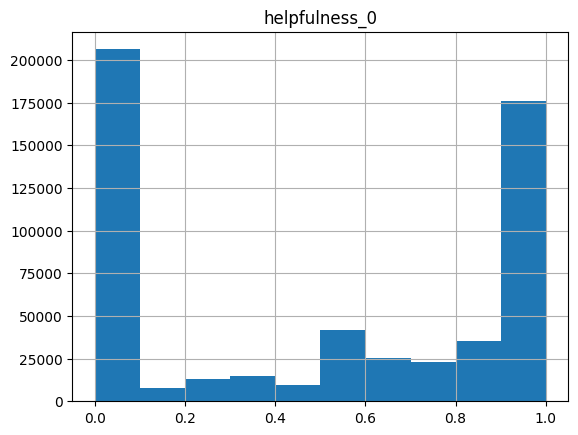

In [66]:
df_all_data.hist(column='helpfulness_0')
plt.show()

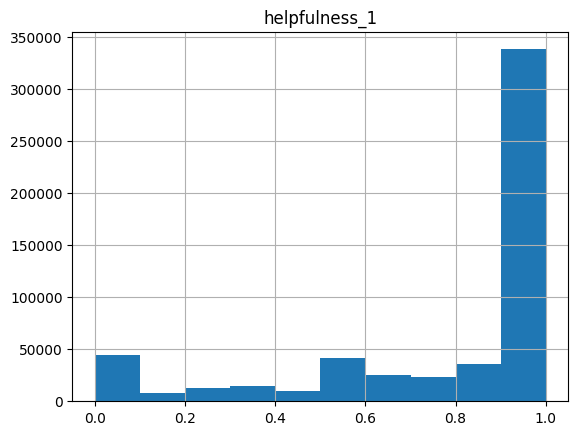

In [67]:
df_all_data.hist(column='helpfulness_1')
plt.show()

In [72]:
#Correlation Analysis 
df_all_data[['helpfulness_0','helpfulness_1','review']].corr().style.background_gradient(cmap='Blues')

,helpfulness_0,helpfulness_1,review
helpfulness_0,1.000000,0.293668,0.068817
helpfulness_1,0.293668,1.000000,0.311470
review,0.068817,0.311470,1.000000


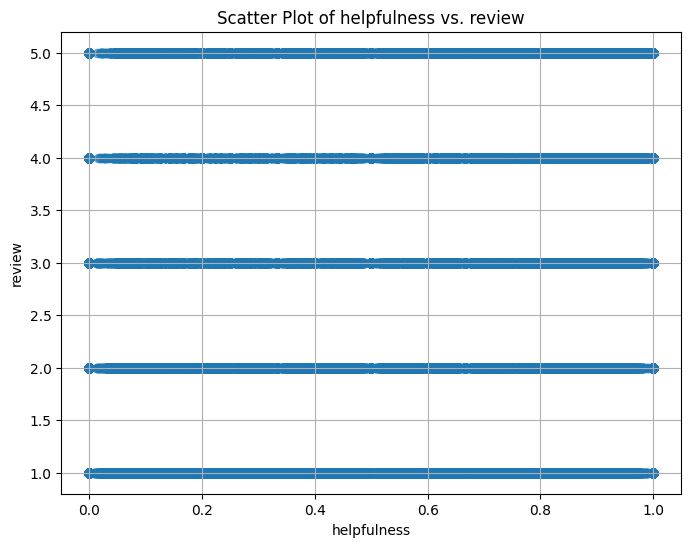

In [69]:
#Check helpfulness agains review 
plt.figure(figsize=(8, 6))
plt.scatter(df_all_data['helpfulness_1'], df_all_data['review'], alpha=0.5) 

# Set labels and title
plt.xlabel('helpfulness')
plt.ylabel('review')
plt.title('Scatter Plot of helpfulness vs. review')

# Show the plot
plt.grid(True)  # Add grid lines for better visualization
plt.show()

#FIXME Numerica vs Numerica debe ser un scatterplot

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)


<Figure size 1000x1000 with 0 Axes>

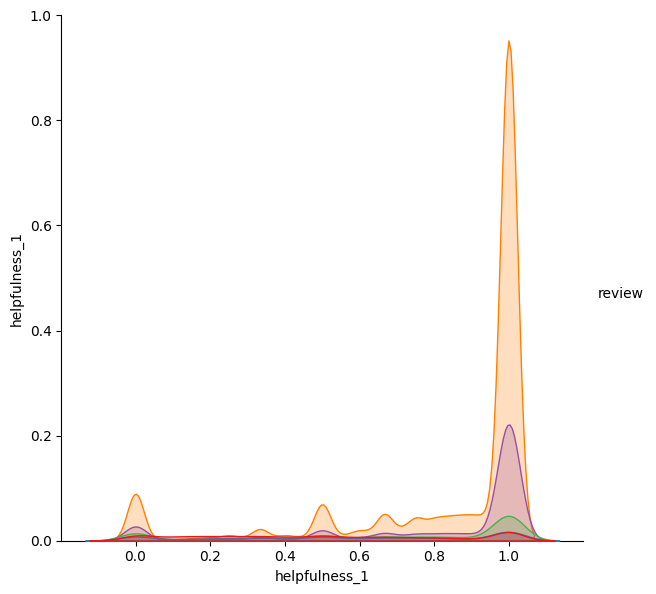

In [75]:
category_palette = sns.color_palette("Set1")
plt.figure(figsize=(10, 10))
sns.pairplot(data=df_all_data[['helpfulness_1','review']], palette=category_palette,markers=["o", "s", "D"], hue="review", height=6)
plt.show()

## EDA for Review Text Column

In [ ]:
pd.set_option('display.max_colwidth', 150)

In [ ]:
df_all_data[df_all_data['review']==5]['text_clean'].sample(5, random_state=1299)

In [ ]:
wordcloud5 = WordCloud(max_words=1000).generate(str(df_all_data[df_all_data['review']==5]['text_clean']))

fig = plt.figure(figsize=(8,8))

plt.axis('off')

plt.imshow(wordcloud5)

plt.show()

In [ ]:
df_all_data[df_all_data['review']==1]['text_clean'].sample(5, random_state=1299)

In [ ]:
df_all_data[df_all_data['review']==3]['text_clean'].sample(5, random_state=1299)

In [ ]:
wordcloud1 = WordCloud(max_words=1000).generate(str(df_all_data[df_all_data['review']==1]['text_clean']))

fig = plt.figure(figsize=(10,8))

plt.axis('off')

plt.imshow(wordcloud1)

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_all_data['text_clean'].str.len(), df_all_data['review'], alpha=0.5)
plt.title('Review Length versus Review Score')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.show()

In [ ]:
df_all_data['text_clean'].str.len().mean()

In [ ]:
df_all_data['text_clean'].str.len().std()

In [ ]:
long_reviews = df_all_data[df_all_data['text_clean'].str.len() > 2000].copy()

len(long_reviews)

In [ ]:
long_reviews.describe().T

In [ ]:
long_reviews['text_clean'].str.len().mean()

In [ ]:
short_reviews = df_all_data[df_all_data['text_clean'].str.len() < 200].copy()

len(short_reviews)

In [ ]:
short_reviews['text_clean'].str.len().mean()

In [ ]:
short_reviews.describe().T

In [ ]:
high_reviews = df_all_data[df_all_data['review'] == 5].copy()

high_reviews['text_clean'].str.len().mean()

In [ ]:
neutral_reviews = df_all_data[df_all_data['review'] == 3].copy() # Neutral ratings tend to be larger in words count

neutral_reviews['text_clean'].str.len().mean()

In [ ]:
low_reviews = df_all_data[df_all_data['review'] == 1].copy()

low_reviews['text_clean'].str.len().mean()

In [ ]:
# Create a figure and a set background color
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')
plt.figure()
plt.hist2d(df_all_data['review_year'], df_all_data['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[df_all_data['review'] != 5]['review_year'], df_all_data[df_all_data['review'] != 5]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[(df_all_data['review'] != 4) & (df_all_data['review'] != 5)]['review_year'], df_all_data[(df_all_data['review'] != 4) & (df_all_data['review'] != 5)]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year (for rating from 1 to 5')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[df_all_data['review_year'] <= 2000]['review_year'], df_all_data[df_all_data['review_year'] <= 2000]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()